**Máquina de Soporte Vectorial**

Algoritmo supervisado comúnmente utilizado para la clasificación de datos.

Ventajas:



*   Cantidad de datos a utilizar
*   Alta velocidad de procesamiento
*   Utiliza subconjuntos de entrenamiento para contrar soluciones
*   Su arquitectura puede ser automatica o personalizada.  



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

dataEMG = pd.read_csv('/content/drive/MyDrive/IA/Investigacion /EMG/emg_features_optimized.csv')
dataEMG

,Activity,Mobility,Complexity,Cluster
0,0.000006,0.258057,0.253174,0
1,0.000005,0.237183,0.304932,0
2,0.000004,0.263184,0.277832,0
3,0.000009,0.185425,0.371826,0
4,0.000026,0.096741,0.594727,0
...,...,...,...,...
471996,0.000002,0.409668,0.303955,0
471997,0.000002,0.361816,0.340332,0
471998,0.000002,0.418701,0.293213,0
471999,0.000003,0.343750,0.345459,0


In [5]:
dataEMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472001 entries, 0 to 472000
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Activity    472001 non-null  float64
 1   Mobility    472001 non-null  float64
 2   Complexity  472001 non-null  float64
 3   Cluster     472001 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 14.4 MB


In [ ]:
dataEMG['Cluster'].unique()

array([0, 1])

In [6]:
dataEMG.describe()

,Activity,Mobility,Complexity,Cluster
count,472001.000000,472001.000000,472001.000000,472001.000000
mean,0.063298,0.239170,0.124075,0.601791
std,0.118930,0.173706,0.145825,0.489529
min,0.000000,0.000000,0.000000,0.000000
25%,0.000001,0.109863,0.013390,0.000000
50%,0.001620,0.169556,0.046967,1.000000
75%,0.077454,0.352295,0.207031,1.000000
max,1.000000,1.000000,1.000000,1.000000


Pairplot


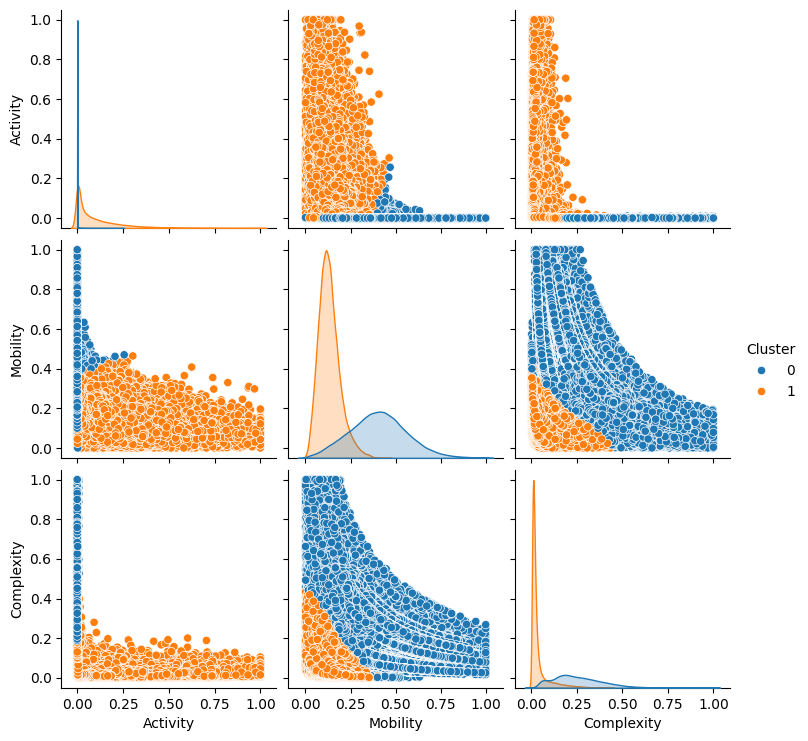

In [ ]:
sns.pairplot(dataEMG, hue='Cluster')

Crear Modelo de SVM

Es un algoritmo de aprendizaje supervisado utilizado en el campo de la clasificación. Su objetivo principal es encontrar un hiperplano que mejor separe dos clases en un espacio de características. Este hiperplano es elegido de manera que maximice la distancia (margen) entre las muestras de datos más cercanas de las dos clases, a las que se hace referencia como "vectores de soporte".

El SVC es particularmente efectivo en la clasificación de datos en espacios de alta dimensión y puede utilizar diferentes funciones de núcleo para manejar datos no linealmente separables. Es una técnica comúnmente utilizada en problemas de clasificación binaria y puede extenderse a la clasificación multiclase.
Este algoritmo combina el preprocesamiento de datos (escalado) con la búsqueda de hiperparámetros para encontrar la mejor configuración para un clasificador SVC.

El resultado final es un modelo entrenado y evaluado en función de la configuración óptima encontrada en la búsqueda de hiperparámetros.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = dataEMG.drop('Cluster',axis=1)

In [9]:
y = dataEMG['Cluster']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1601)

Importar la libreria para svm

In [11]:
from sklearn.svm import SVC

In [12]:
modelo = SVC(probability=True)

In [13]:
modelo.fit(x_train,y_train)

SVC(probability=True)

In [14]:
Predicciones = modelo.predict(x_test)

In [15]:
Predicciones

array([1, 1, 1, ..., 0, 1, 0])

In [16]:
x_test, y_test

(            Activity  Mobility  Complexity
 188106  9.387207e-02  0.098389    0.014679
 120420  3.576279e-07  0.318115    0.056854
 121241  2.410889e-03  0.076538    0.016174
 105596  5.960464e-08  0.521484    0.187988
 251567  2.920628e-06  0.279541    0.255615
 ...              ...       ...         ...
 385149  1.921654e-03  0.087402    0.039276
 414910  6.537437e-04  0.111084    0.055359
 135087  8.821487e-06  0.210815    0.816406
 57138   8.288574e-02  0.087646    0.008720
 288964  1.609325e-06  0.422363    0.236938
 
 [141601 rows x 3 columns],
 188106    1
 120420    1
 121241    1
 105596    0
 251567    0
          ..
 385149    1
 414910    1
 135087    0
 57138     1
 288964    0
 Name: Cluster, Length: 141601, dtype: int64)

Importar las librerias para el reporte de clasificación y la matriz de confusión

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test, Predicciones, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9997    0.9998     56414
           1     0.9998    1.0000    0.9999     85187

    accuracy                         0.9999    141601
   macro avg     0.9999    0.9998    0.9999    141601
weighted avg     0.9999    0.9999    0.9999    141601



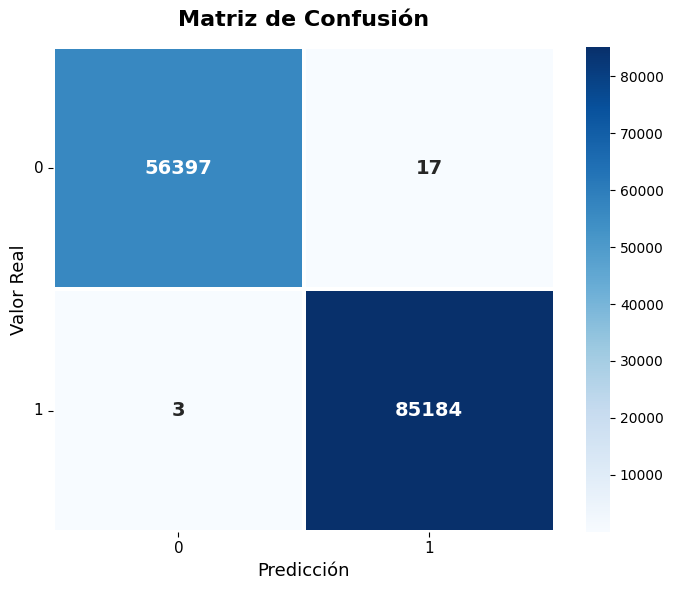

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Calcular matriz de confusión ---
cm = confusion_matrix(y_test, Predicciones)
labels = np.unique(y_test)  # etiquetas de clases detectadas

# --- Gráfica ---
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"}, cbar=True, linewidths=1.5)

# --- Estilo ---
plt.title('Matriz de Confusión', fontsize=16, pad=15, weight='bold')
plt.xlabel('Predicción', fontsize=13)
plt.ylabel('Valor Real', fontsize=13)

# Ajustes estéticos
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

# Mostrar
plt.show()

In [ ]:
#import pickle

#model_path = '/content/drive/MyDrive/IA/Investigacion /EMG/Maquina de soporte vectorial /SVM_model.pkl'

#with open(model_path, 'wb') as f:
#    pickle.dump(modelo, f)

#print(f"Model saved to {model_path}")


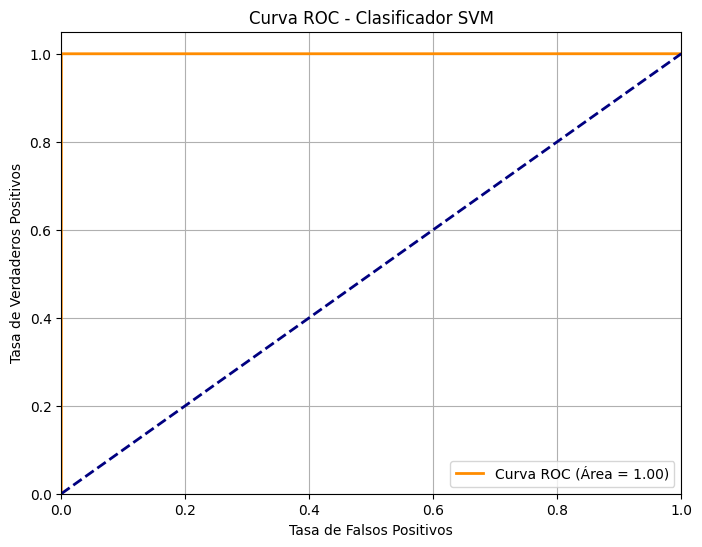

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Re-initialize and fit the model with probability=False
#modelo = SVC(probability=False)
#modelo.fit(x_train, y_train)

# Verifica si es clasificación binaria
if len(np.unique(y_test)) == 2:
    # Obtener los valores de la función de decisión
    y_score = modelo.decision_function(x_test)

    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - Clasificador SVM')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("La curva ROC requiere un problema de clasificación binaria.")

In [ ]:
import time
import sys
import psutil
import os
import pickle
import numpy as np

# --- CONFIGURACIÓN ---
N_ITER = 100  # Número de iteraciones para estimar tiempo promedio

# --- TIEMPO DE INFERENCIA (PROMEDIO Y DESVIACIÓN ESTÁNDAR) ---
tiempos = []
for _ in range(N_ITER):
    start_time = time.perf_counter()
    _ = modelo.predict(x_test)
    end_time = time.perf_counter()
    tiempos.append(end_time - start_time)

inference_mean = np.mean(tiempos)
inference_std = np.std(tiempos)
print(f"Inference time: {inference_mean:.6f} ± {inference_std:.6f} seconds "
      f"(based on {N_ITER} iterations)")

# --- CONSUMO DE MEMORIA DEL MODELO (MB) ---
model_memory_bytes = sys.getsizeof(modelo)
model_memory_mb = model_memory_bytes / (1024 ** 2)
print(f"Model memory (approx.): {model_memory_mb:.6f} MB")

# --- USO DE RAM DEL PROCESO (MB) ---
process = psutil.Process(os.getpid())
ram_usage_bytes = process.memory_info().rss
ram_usage_mb = ram_usage_bytes / (1024 ** 2)
print(f"RAM usage: {ram_usage_mb:.6f} MB")

# --- USO DE ESPACIO EN DISCO (MB) ---
model_filename = 'svm_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(modelo, f)
disk_usage_bytes = os.path.getsize(model_filename)
disk_usage_mb = disk_usage_bytes / (1024 ** 2)
os.remove(model_filename)
print(f"Model disk space (exported): {disk_usage_mb:.6f} MB")

Inference time: 15.225584 ± 0.463520 seconds (based on 100 iterations)
Model memory (approx.): 0.000046 MB
RAM usage: 640.882812 MB
Model disk space (exported): 0.107649 MB


In [19]:
import pickle

model_path = 'SVM_model.pkl'

with open(model_path, 'wb') as f:
    pickle.dump(modelo, f)

print(f"Model exported successfully to {model_path}")

Model exported successfully to SVM_model.pkl
